#CREDIT CARD FRAUD DETECTION 

# Data Preprocessing

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Exploratory data analysis
Reading and understanding the data**


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/capstone/dataset_2.csv')
df2.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df2.shape

(1852394, 23)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

**Handling missing values**

In [ ]:
df2.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Checking the distribution of the classes**

In [ ]:
df2.is_fraud.value_counts()


0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
df2.is_fraud.value_counts()*100/df2.shape[0]


0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

**Downsampling Data**

In [ ]:
from sklearn.utils import resample 
df_valid = df2[df2.iloc[:,22].values==0] # .iloc[:,22] = is_fraud
df_fraud = df2[df2.iloc[:,22].values==1] 
 

df_valid_downsampled = resample(df_valid,
                                 n_samples=19302,    
                                 random_state=42)    
 

df_downsampled = pd.concat([df_valid_downsampled, df_fraud])
 

df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28953 entries, 123118 to 1814246
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28953 non-null  int64  
 1   trans_date_trans_time  28953 non-null  object 
 2   cc_num                 28953 non-null  int64  
 3   merchant               28953 non-null  object 
 4   category               28953 non-null  object 
 5   amt                    28953 non-null  float64
 6   first                  28953 non-null  object 
 7   last                   28953 non-null  object 
 8   gender                 28953 non-null  object 
 9   street                 28953 non-null  object 
 10  city                   28953 non-null  object 
 11  state                  28953 non-null  object 
 12  zip                    28953 non-null  int64  
 13  lat                    28953 non-null  float64
 14  long                   28953 non-null  float64


In [ ]:
df_downsampled.is_fraud.value_counts()

0    19302
1     9651
Name: is_fraud, dtype: int64

**Dividing transaction date and month**

In [ ]:
# Change date to be date type
df_downsampled['trans_date_trans_time'] = pd.to_datetime(df_downsampled['trans_date_trans_time'])
# Create column week number
df_downsampled['week_number'] = df_downsampled['trans_date_trans_time'].dt.dayofweek
assert df_downsampled['week_number'].max() == 6
# Create column month number
df_downsampled['month_number'] = df_downsampled['trans_date_trans_time'].dt.month
assert df_downsampled['month_number'].max() == 12
# Create column year
df_downsampled['year'] = df_downsampled['trans_date_trans_time'].dt.year
df_downsampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
123118,123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,...,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,1331349870,42.974691,-73.944930,0,6,3,2019
675160,675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,...,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,1350229247,41.046486,-74.132901,0,0,10,2019
133167,133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,...,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,1331738511,34.956184,-86.986784,0,3,3,2019
1422423,125748,2020-08-04 00:05:40,3542162746848552,fraud_Stamm-Witting,shopping_net,2.30,Bradley,Anderson,M,3896 Gilmore Mill,...,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,1375574740,43.455569,-93.662698,0,1,8,2020
261154,261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,...,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,1336640660,46.851874,-97.269843,0,4,5,2019


In [ ]:
df_downsampled.shape

(28953, 26)

**Category (One-Hot Endcoding)**

In [ ]:
category_onehot = pd.get_dummies(df_downsampled.category, prefix='category')


In [ ]:
df_downsampled = df_downsampled.join(category_onehot)


In [ ]:
#pd.merge([df_downsampled, category_onehot],suffixes=('_left', '_right'))
#pd.merge(df_downsampled, category_onehot, on='y')
#df_downsampled.merge(category_onehot)
#df_downsampled = df_downsampled.join(category_onehot)


In [ ]:
df_downsampled.shape

(29161, 40)

In [ ]:
df_downsampled

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
37,37,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,...,0,0,0,0,0,1,0,0,0,0
64,64,2019-01-01 00:45:13,4716561796955522,"fraud_Huel, Hammes and Witting",grocery_pos,92.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,...,1,0,0,0,0,0,0,0,0,0
126,126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,F,566 Megan Well,...,0,0,0,0,0,0,0,0,0,0
159,159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,F,6574 William Hill Apt. 375,...,0,0,0,0,1,0,0,0,0,0
209,209,2019-01-01 02:36:15,3573386445588324,fraud_Keeling-Crist,misc_pos,7.16,Stephanie,Murphy,F,526 Stacy Walks,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851810,555135,2020-12-31 20:39:05,376445266762684,fraud_Jakubowski Group,food_dining,1.16,Rachel,Lowe,F,372 Jeffrey Course,...,0,0,0,0,0,0,0,0,0,0
1852011,555336,2020-12-31 21:43:27,30501624614310,fraud_Renner Ltd,home,63.57,Amanda,Smith,F,180 Graves Shore,...,0,0,1,0,0,0,0,0,0,0
1852124,555449,2020-12-31 22:21:56,346273234529002,fraud_Volkman PLC,food_dining,46.46,Donna,Moreno,F,32301 Albert River Suite 364,...,0,0,0,0,0,0,0,0,0,0
1852207,555532,2020-12-31 22:53:17,567868110212,fraud_Effertz LLC,entertainment,44.94,Dawn,Tucker,F,789 Herring Manors,...,0,0,0,0,0,0,0,0,0,0


**Changing gender from nominal to numerical**

In [ ]:

df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())


Gender of train dataset 0    15823
1    13338
Name: gender, dtype: int64


**Converting Merchant to be numerical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_lable = df_downsampled['merchant']
df_downsampled['merchant_number'] = label_encoder.fit_transform(x_lable)


print('Merchant Number of train dataset',df_downsampled['merchant_number'])

Merchant Number of train dataset 37         225
64         270
126        332
159        475
209        297
          ... 
1851810    278
1852011    512
1852124    648
1852207    151
1852208    306
Name: merchant_number, Length: 29161, dtype: int64


**Finding Age from date of birth data**

In [ ]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))


df_downsampled['dob'] = pd.to_datetime(df_downsampled['dob'])
df_downsampled['age'] = df_downsampled['dob']
df_downsampled['age'] = df_downsampled.apply (lambda row: calculate_age(row), axis=1)


print('Age of train dataset', df_downsampled['age'].head(3))


Age of train dataset 37     37
64     49
126    63
Name: age, dtype: int64


**Converting Marchant to be numerical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

x_lable = df_downsampled['job']
df_downsampled['job_number'] = label_encoder.fit_transform(x_lable)
print(df_downsampled['job_number'])


37         197
64         492
126        356
159        481
209        447
          ... 
1851810    248
1852011    278
1852124    437
1852207    110
1852208    398
Name: job_number, Length: 29161, dtype: int64


**Selecting required data**

In [ ]:
df_downsampled.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'week_number', 'month_number',
       'year', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'merchant_number', 'age',
       'job_number'],
      dtype='object')

In [ ]:
final_data1 = df_downsampled[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_number','is_fraud']]
final_data1.shape

(29161, 31)

**Scaling data**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [ ]:
new = scaler.fit_transform(final_data1)
final_data = pd.DataFrame(new, columns=final_data1.columns)
final_data

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,is_fraud
0,4.268159e-05,0.012467,0.0,0.383281,0.259843,0.773118,0.006764,0.000000,0.264290,0.761335,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.325145,0.0
1,9.447464e-04,0.006348,0.0,0.589790,0.605376,0.540581,0.000248,0.000017,0.618807,0.532344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.390173,0.0
2,7.146578e-04,0.003995,0.0,0.125253,0.514947,0.917426,0.000429,0.000063,0.514052,0.908925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479769,0.0
3,6.085720e-06,0.000901,0.0,0.174086,0.461732,0.921842,0.002231,0.000085,0.448957,0.906355,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.686416,0.0
4,7.157608e-04,0.000426,0.0,0.569296,0.550578,0.686835,0.000014,0.000122,0.567180,0.690029,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.429191,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29156,7.539238e-05,0.000011,0.0,0.688275,0.452762,0.660407,0.000608,0.999872,0.441696,0.665572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401734,0.0
29157,6.097575e-06,0.004325,0.0,0.290704,0.271106,0.863949,0.000096,0.999934,0.283129,0.857635,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739884,0.0
29158,6.934872e-05,0.003142,0.0,0.240341,0.379605,0.871960,0.001566,0.999970,0.372838,0.872633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416,0.0
29159,1.016460e-07,0.003037,0.0,0.767757,0.208856,0.719069,1.000000,1.000000,0.199060,0.719377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218208,0.0


# Data Visualization

**Visual representation**

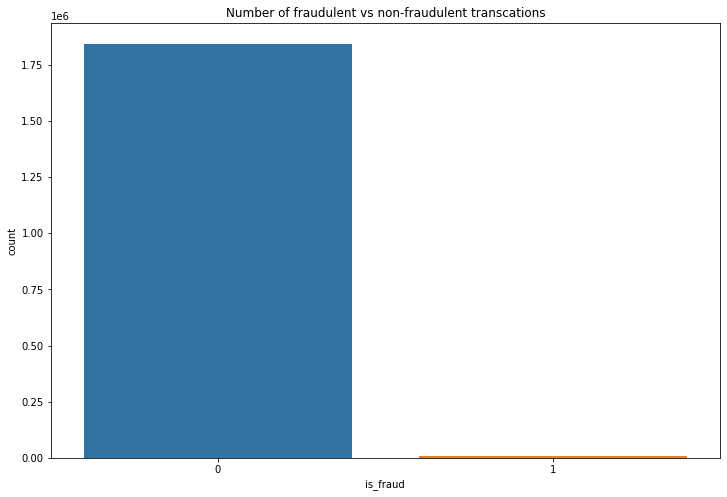

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='is_fraud', data=df2)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

**Observe the distribution of classes with time**

In [ ]:
#Fraud Transactions
fraud=final_data[final_data.is_fraud==1]
#Valid Transactions
valid=final_data[final_data.is_fraud==0]

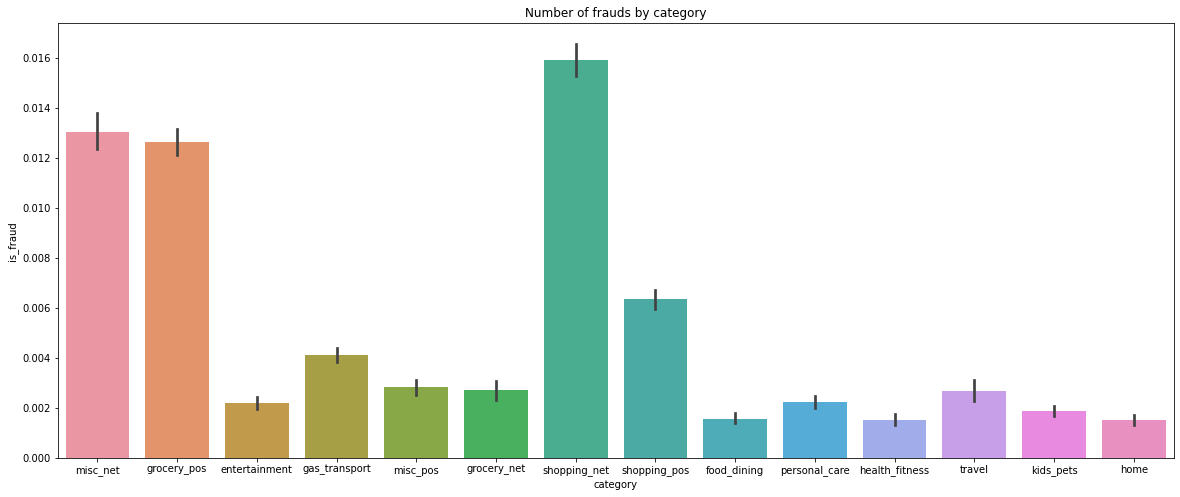

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=df2)

**Observe the distribution of classes with amount**

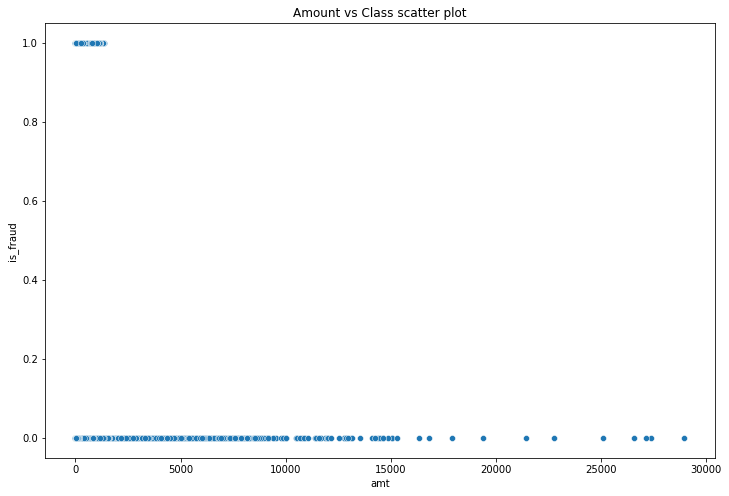

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,8))
sns.scatterplot(df2["amt"], df2["is_fraud"])
plt.title("Amount vs Class scatter plot")
plt.show()

Clearly low amount transactions are more likely to be fraudulent than high amount transaction

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop(['is_fraud'], axis=1)

In [ ]:
y = final_data['is_fraud']

In [ ]:
X

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number
0,4.268159e-05,0.012467,0.0,0.383281,0.259843,0.773118,0.006764,0.000000,0.264290,0.761335,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.325145
1,9.447464e-04,0.006348,0.0,0.589790,0.605376,0.540581,0.000248,0.000017,0.618807,0.532344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.390173
2,7.146578e-04,0.003995,0.0,0.125253,0.514947,0.917426,0.000429,0.000063,0.514052,0.908925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479769
3,6.085720e-06,0.000901,0.0,0.174086,0.461732,0.921842,0.002231,0.000085,0.448957,0.906355,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.686416
4,7.157608e-04,0.000426,0.0,0.569296,0.550578,0.686835,0.000014,0.000122,0.567180,0.690029,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.429191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29156,7.539238e-05,0.000011,0.0,0.688275,0.452762,0.660407,0.000608,0.999872,0.441696,0.665572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401734
29157,6.097575e-06,0.004325,0.0,0.290704,0.271106,0.863949,0.000096,0.999934,0.283129,0.857635,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739884
29158,6.934872e-05,0.003142,0.0,0.240341,0.379605,0.871960,0.001566,0.999970,0.372838,0.872633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416
29159,1.016460e-07,0.003037,0.0,0.767757,0.208856,0.719069,1.000000,1.000000,0.199060,0.719377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218208


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29156    0.0
29157    0.0
29158    0.0
29159    0.0
29160    0.0
Name: is_fraud, Length: 29161, dtype: float64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [ ]:
print('length of X_train:',len(X_train))
print('length of y_train:',len(y_train))
print('length of X_test:',len(X_test))
print('length of y_test:',len(y_test))

length of X_train: 20412
length of y_train: 20412
length of X_test: 8749
length of y_test: 8749


In [ ]:
X_test.shape

(8749, 30)

# Model Building

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Log_Reg = LogisticRegression()

In [ ]:
Log_Reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred0 = Log_Reg.predict(X_test)
y_pred0

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
cn0 = confusion_matrix(y_test,y_pred0)

In [ ]:
pd.crosstab(y_test,y_pred0, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0.0,1.0,All
Actual,,,
0.0,5634,215,5849
1.0,854,2046,2900
All,6488,2261,8749


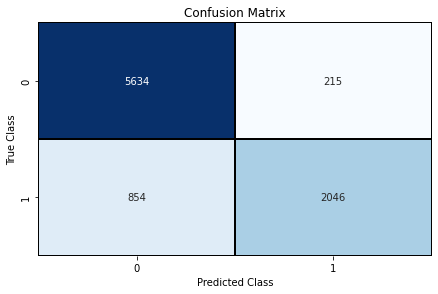

In [ ]:
sns.heatmap(cn0, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred0,digits=6))

              precision    recall  f1-score   support

         0.0   0.868372  0.963242  0.913350      5849
         1.0   0.904909  0.705517  0.792870      2900

    accuracy                       0.877815      8749
   macro avg   0.886641  0.834379  0.853110      8749
weighted avg   0.880483  0.877815  0.873415      8749



In [ ]:
logpre = precision_score(y_test,y_pred0)*100
logre = recall_score(y_test,y_pred0)*100 
logacc = accuracy_score(y_test,y_pred0)*100
logf1 = f1_score(y_test,y_pred0)*100

In [ ]:
print('Isolation forest accuracy score:',logacc)
print('Isolation forest precision score:',logpre)
print('Isolation forest recall score:',logre)
print('Isolation forest f1 score:',logf1)

Isolation forest accuracy score: 87.7814607383701
Isolation forest precision score: 90.49093321539142
Isolation forest recall score: 70.55172413793103
Isolation forest f1 score: 79.28695989149391


## K-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(init='k-means++',n_clusters=2,n_init=10)

In [ ]:
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

In [ ]:
y_pred1 = kmeans.predict(X_test)

In [ ]:
y_pred1

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
np.unique(y_pred1, return_counts=True)

(array([0, 1], dtype=int32), array([4524, 4225]))

In [ ]:
cn1 = confusion_matrix(y_test,y_pred1)

In [ ]:
pd.crosstab(y_test,y_pred1, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0.0,2919,2930,5849
1.0,1605,1295,2900
All,4524,4225,8749


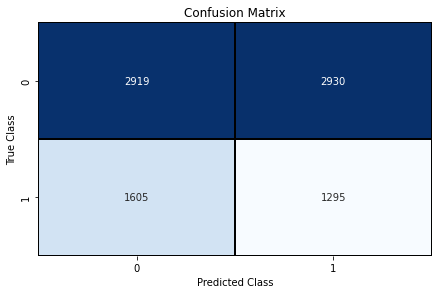

In [ ]:
sns.heatmap(cn1, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred1,digits=6))

              precision    recall  f1-score   support

         0.0   0.645225  0.499060  0.562807      5849
         1.0   0.306509  0.446552  0.363509      2900

    accuracy                       0.481655      8749
   macro avg   0.475867  0.472806  0.463158      8749
weighted avg   0.532952  0.481655  0.496747      8749



In [ ]:
kre = recall_score(y_test,y_pred1)*100
kpre = precision_score(y_test,y_pred1)*100
kacc = accuracy_score(y_test,y_pred1)*100
kf1 = f1_score(y_test,y_pred1)*100



In [ ]:
print('Kmeans accuracy score:',kacc)
print('Kmeans precision score:',kpre)
print('Kmeans recall score:',kre)
print('Kmeans f1 score:',kf1)

Kmeans accuracy score: 48.16550462910047
Kmeans precision score: 30.650887573964496
Kmeans recall score: 44.6551724137931
Kmeans f1 score: 36.35087719298246


## Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
anomalies_fraction=len(fraud)/len(final_data)
anomalies_fraction

0.3309557285415452

In [ ]:
lof=LocalOutlierFactor(
        n_neighbors=20,
        contamination=anomalies_fraction,
        novelty = True
          )


In [ ]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.3309557285415452, novelty=True)

In [ ]:
y_pred2 = lof.predict(X_test)

In [ ]:
y_pred2

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
np.unique(y_pred2, return_counts=True)

(array([-1,  1]), array([3033, 5716]))

In [ ]:
y_pred2[y_pred2==1]=0
y_pred2[y_pred2==-1]=1

In [ ]:
np.unique(y_pred2, return_counts=True)

(array([0, 1]), array([5716, 3033]))

In [ ]:
cn2 = confusion_matrix(y_test,y_pred2)

In [ ]:
pd.crosstab(y_test,y_pred2, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0.0,3782,2067,5849
1.0,1934,966,2900
All,5716,3033,8749


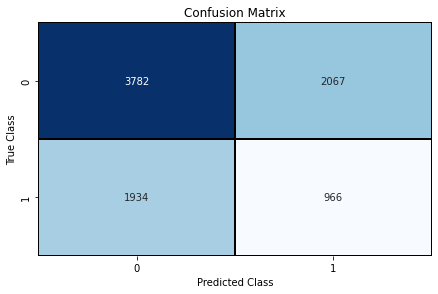

In [ ]:
sns.heatmap(cn2, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred2,digits=6))

              precision    recall  f1-score   support

         0.0   0.661652  0.646606  0.654042      5849
         1.0   0.318497  0.333103  0.325636      2900

    accuracy                       0.542691      8749
   macro avg   0.490074  0.489855  0.489839      8749
weighted avg   0.547907  0.542691  0.545187      8749



In [ ]:
lofacc = accuracy_score(y_test,y_pred2)*100
lofre = recall_score(y_test,y_pred2)*100
lofpre = precision_score(y_test,y_pred2)*100
loff1 = f1_score(y_test,y_pred2)*100

In [ ]:
print('Local outlier factor accuracy score:',lofacc)
print('Local outlier factor precision score:',lofpre)
print('Local outlier factor recall score:',lofre)
print('Local outlier factor f1 score:',loff1)

Local outlier factor accuracy score: 54.269059321065264
Local outlier factor precision score: 31.849653808110784
Local outlier factor recall score: 33.310344827586206
Local outlier factor f1 score: 32.56362717006574


## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
Iso_Forest=IsolationForest(contamination=anomalies_fraction, max_samples=len(X))

In [ ]:
Iso_Forest.fit(X_train,y_train)

IsolationForest(contamination=0.3309557285415452, max_samples=29161)

In [ ]:
y_pred3 = Iso_Forest.predict(X_test)
y_pred3

array([-1,  1, -1, ...,  1,  1,  1])

In [ ]:
np.unique(y_pred3, return_counts=True)

(array([-1,  1]), array([3072, 5677]))

In [ ]:
y_pred3[y_pred3==1]=0
y_pred3[y_pred3==-1]=1

In [ ]:
np.unique(y_pred3, return_counts=True)

(array([0, 1]), array([5677, 3072]))

In [ ]:
cn3 = confusion_matrix(y_test,y_pred3)

In [ ]:
pd.crosstab(y_test,y_pred3, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0.0,3816,2033,5849
1.0,1861,1039,2900
All,5677,3072,8749


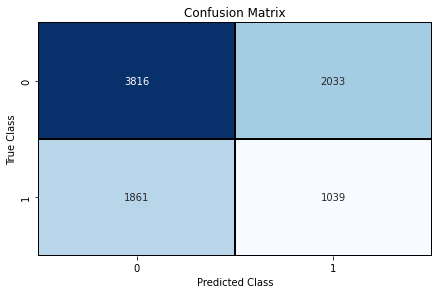

In [ ]:
sns.heatmap(cn3, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3,digits=6))

              precision    recall  f1-score   support

         0.0   0.672186  0.652419  0.662155      5849
         1.0   0.338216  0.358276  0.347957      2900

    accuracy                       0.554921      8749
   macro avg   0.505201  0.505348  0.505056      8749
weighted avg   0.561486  0.554921  0.558009      8749



In [ ]:
isofpre = precision_score(y_test,y_pred3)*100
isofre = recall_score(y_test,y_pred3)*100 
isofacc = accuracy_score(y_test,y_pred3)*100
isoff1 = f1_score(y_test,y_pred3)*100

In [ ]:
print('Isolation forest accuracy score:',isofacc)
print('Isolation forest precision score:',isofpre)
print('Isolation forest recall score:',isofre)
print('Isolation forest f1 score:',isoff1)

Isolation forest accuracy score: 55.49205623499829
Isolation forest precision score: 33.82161458333333
Isolation forest recall score: 35.82758620689655
Isolation forest f1 score: 34.79571332886805


## Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(20412, 30)

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 30,activation='relu'),   # input of 30 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
1361/1361 [==============================] - 3s 2ms/step - loss: 0.5743 - accuracy: 0.7081
Epoch 2/5
1361/1361 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.8221
Epoch 3/5
1361/1361 [==============================] - 2s 2ms/step - loss: 0.3462 - accuracy: 0.8723
Epoch 4/5
1361/1361 [==============================] - 3s 2ms/step - loss: 0.3075 - accuracy: 0.8832
Epoch 5/5
1361/1361 [==============================] - 3s 2ms/step - loss: 0.2897 - accuracy: 0.8869


In [ ]:
y_pred4 = model.predict(X_test)

In [ ]:
y_pred4[1]

array([0.9710874], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

274/274 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.9027


[0.26360267400741577, 0.902731716632843]

In [ ]:
cn4 = confusion_matrix(y_test,y_pred4.round())
cn4

array([[5767,   82],
       [ 769, 2131]])

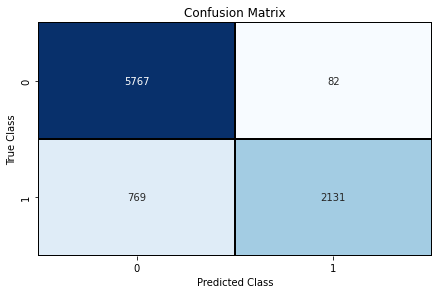

In [ ]:
sns.heatmap(cn4, annot=True, cbar=None,  linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred4.round(),digits=6))

              precision    recall  f1-score   support

         0.0   0.882344  0.985981  0.931288      5849
         1.0   0.962946  0.734828  0.833562      2900

    accuracy                       0.902732      8749
   macro avg   0.922645  0.860404  0.882425      8749
weighted avg   0.909061  0.902732  0.898895      8749



In [ ]:
nnacc = accuracy_score(y_test,y_pred4.round())*100
nnpre = precision_score(y_test,y_pred4.round())*100
nnre = recall_score(y_test,y_pred4.round())*100
nnf1 = f1_score(y_test,y_pred4.round())*100

In [ ]:
print('Neural network accuracy score:',nnacc)
print('Neural network precision score:',nnpre)
print('Neural network recall score:',nnre)
print('Neural network f1 score:',nnf1)

Neural network accuracy score: 90.27317407703738
Neural network precision score: 96.29462268413917
Neural network recall score: 73.48275862068967
Neural network f1 score: 83.35615098767846


# Model Comparision

In [ ]:
table = pd.DataFrame({'Models':['Logestic Regression','Local Outlier Factor','Isolation Forest','K-Means Clustering','Neural Networks'],
                      'Accuracy':[logacc,lofacc,isofacc,kacc,nnacc],
                      'Precision':[logpre,lofpre,isofpre,kpre,nnpre],
                      'FalseNegRate':[(100-logre),(100-lofre),(100-isofre),(100-kre),(100-nnre)],
                      'Recall':[logre,lofre,isofre,kre,nnre],
                      'f1score':[logf1,loff1,isoff1,kf1,nnf1]})
table

,Models,Accuracy,Precision,FalseNegRate,Recall,f1score
0,Logestic Regression,87.781461,90.490933,29.448276,70.551724,79.286960
1,Local Outlier Factor,54.269059,31.849654,66.689655,33.310345,32.563627
2,Isolation Forest,55.492056,33.821615,64.172414,35.827586,34.795713
3,K-Means Clustering,48.165505,30.650888,55.344828,44.655172,36.350877
4,Neural Networks,90.273174,96.294623,26.517241,73.482759,83.356151


In [ ]:
table.to_csv(r'/content/drive/MyDrive/capstone/model_result2.csv', index = False)

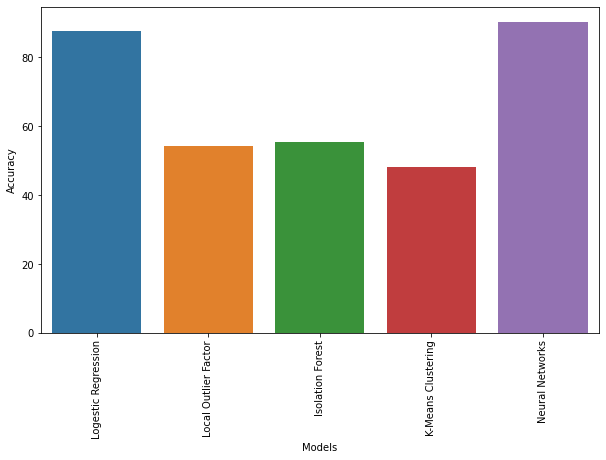

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Accuracy,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

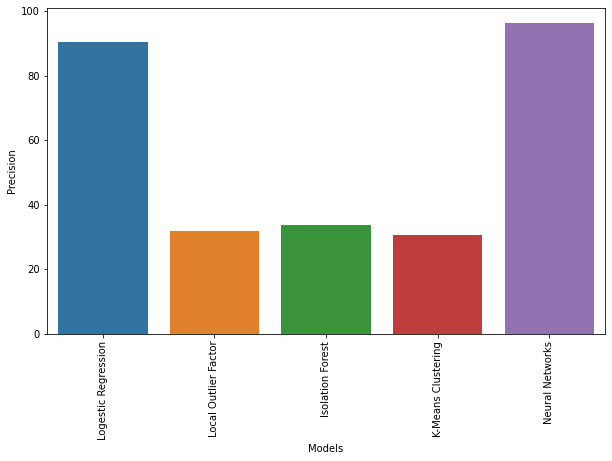

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Precision,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

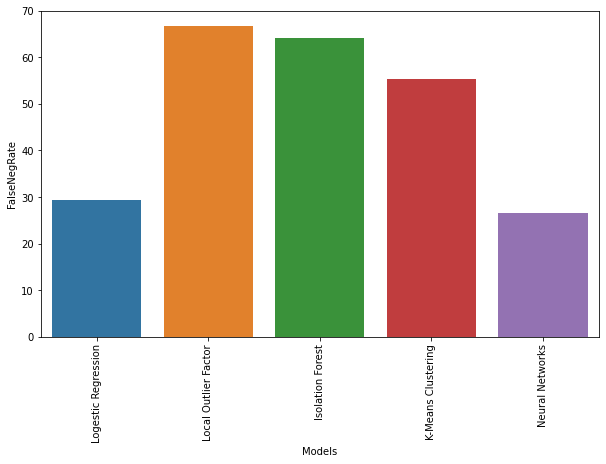

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.FalseNegRate,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

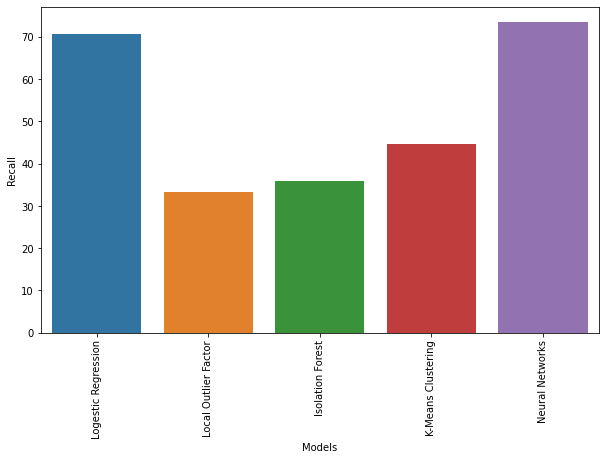

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Recall,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

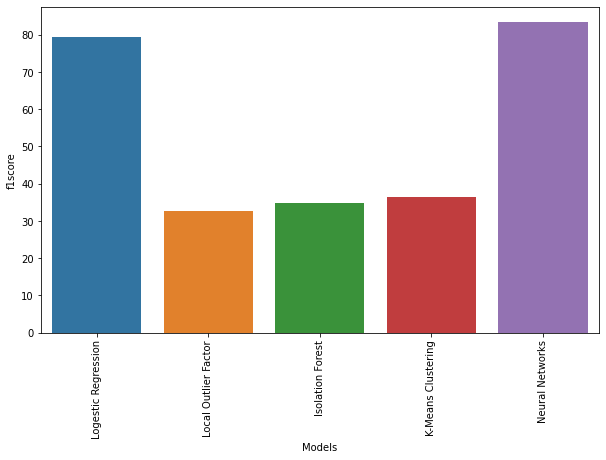

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.f1score,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()